In [1]:
!pip install keras

In [2]:
!pip install tensorflow

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import tqdm
import random
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')

In [15]:
input_path = []
label = []



for path in os.listdir("C:/Users/Paridhi/Desktop/Topics in AI/AI Final Project/train/"):
    if "cat" in path:
        label.append(0)
    else:
        label.append(1)
    
    input_path.append(os.path.join("C:/Users/Paridhi/Desktop/Topics in AI/AI Final Project/train/", path))
    
print(input_path[0], label[0])

C:/Users/Paridhi/Desktop/Topics in AI/AI Final Project/train/cat.0.jpg 0


In [16]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

images  label
0  C:/Users/Paridhi/Desktop/Topics in AI/AI Final...      1
1  C:/Users/Paridhi/Desktop/Topics in AI/AI Final...      0
2  C:/Users/Paridhi/Desktop/Topics in AI/AI Final...      0
3  C:/Users/Paridhi/Desktop/Topics in AI/AI Final...      0
4  C:/Users/Paridhi/Desktop/Topics in AI/AI Final...      1

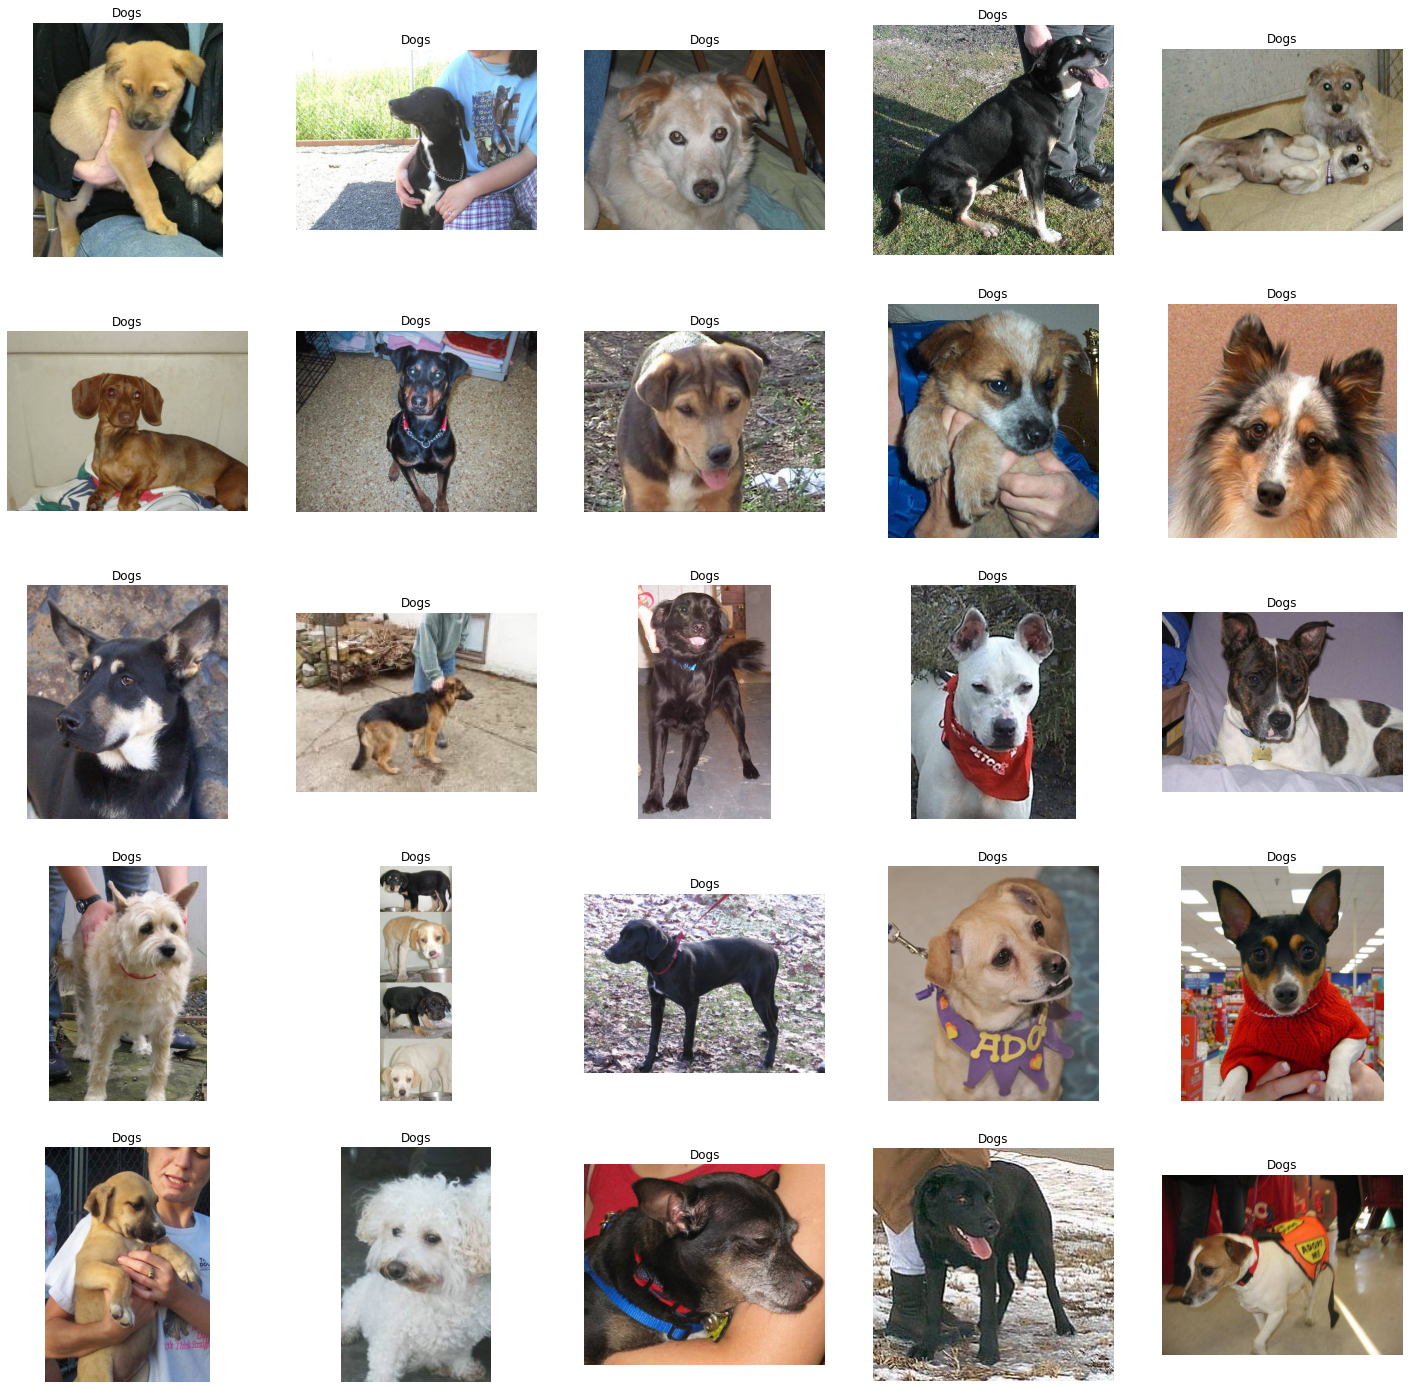

In [17]:
# to display grid of images
plt.figure(figsize=(25,25))
temp = df[df['label']==1]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]



for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Dogs')
    plt.axis('off')

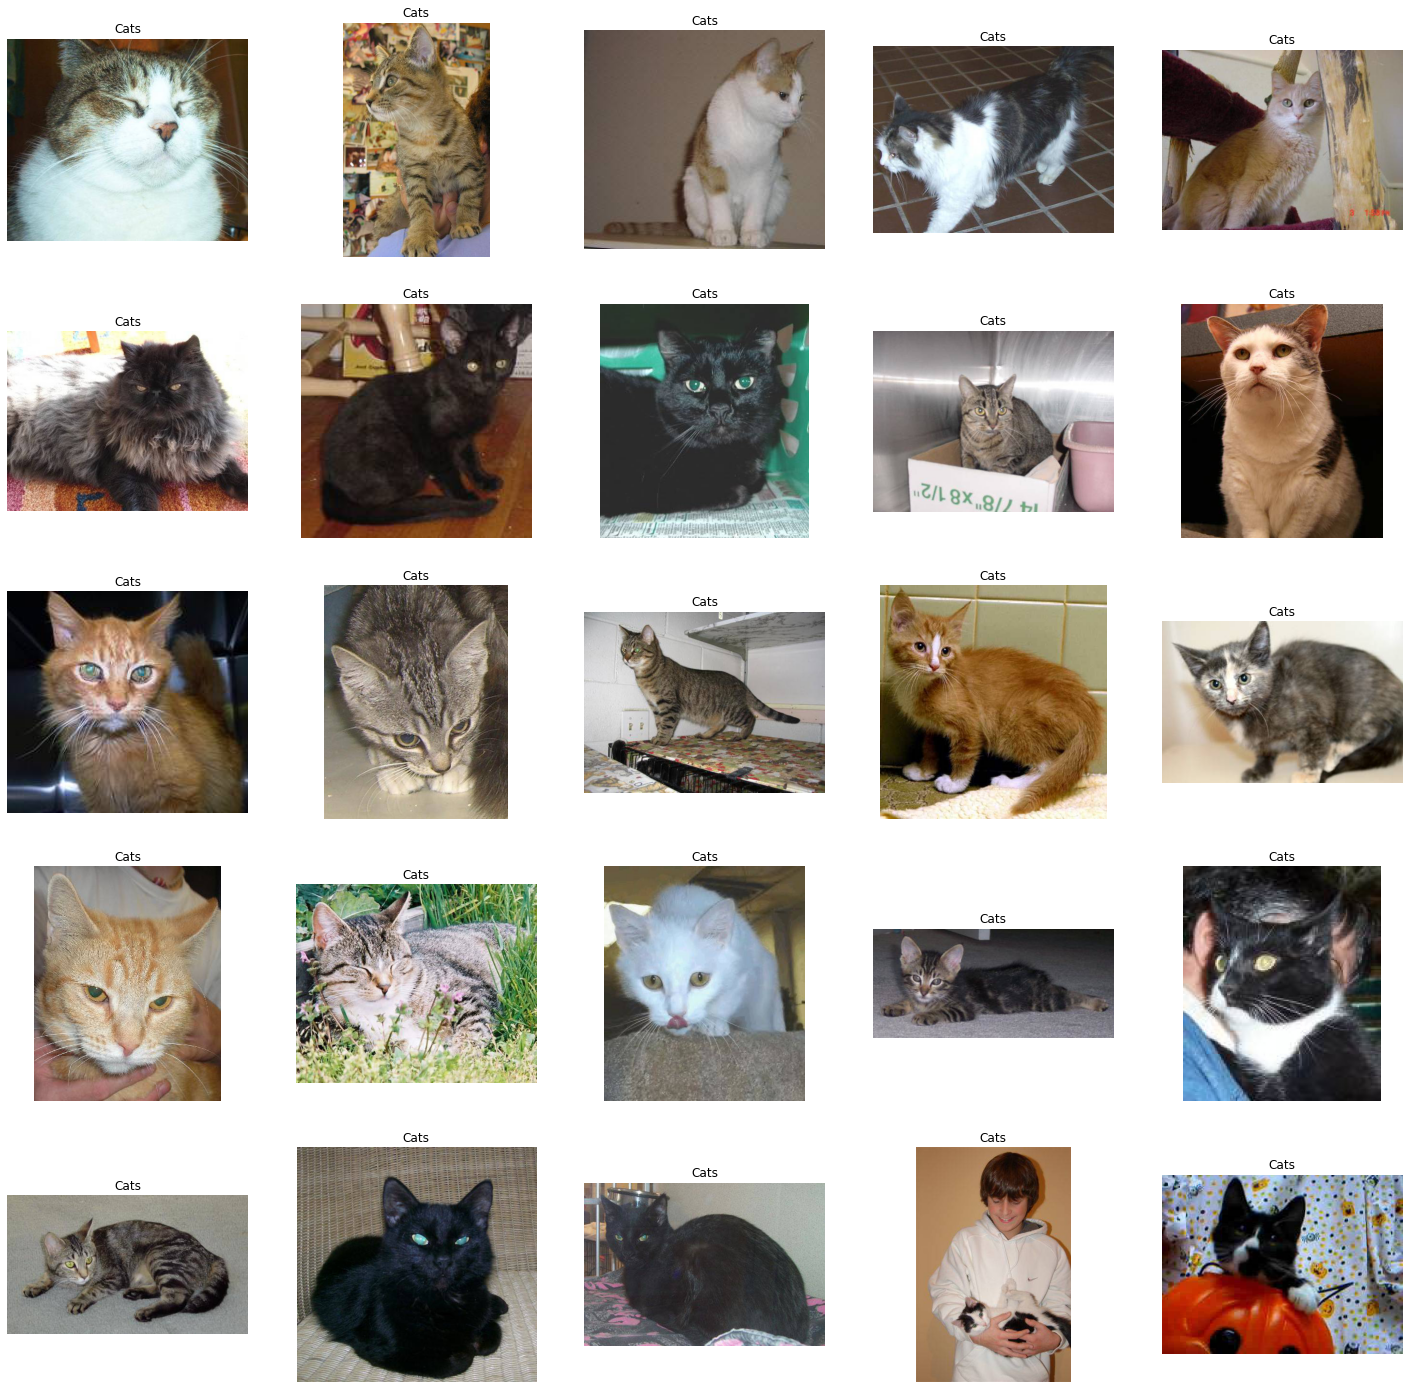

In [18]:
# to display grid of images
plt.figure(figsize=(25,25))
temp = df[df['label']==0]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]



for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Cats')
    plt.axis('off')

<AxesSubplot:xlabel='label', ylabel='count'>

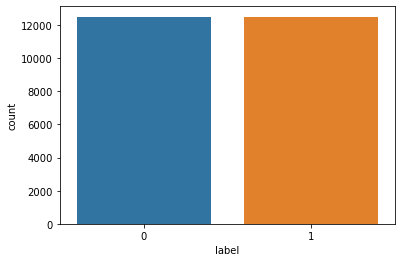

In [19]:
import seaborn as sns
sns.countplot(df['label'])

In [20]:
df['label'] = df['label'].astype('str')
df.head()

images label
0  C:/Users/Paridhi/Desktop/Topics in AI/AI Final...     1
1  C:/Users/Paridhi/Desktop/Topics in AI/AI Final...     0
2  C:/Users/Paridhi/Desktop/Topics in AI/AI Final...     0
3  C:/Users/Paridhi/Desktop/Topics in AI/AI Final...     0
4  C:/Users/Paridhi/Desktop/Topics in AI/AI Final...     1

In [21]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [22]:
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(
    rescale = 1./255, # normalization of images
    rotation_range = 40, # augmention of images to avoid overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)



val_generator = ImageDataGenerator(rescale = 1./255)



train_iterator = train_generator.flow_from_dataframe(
    train,
    x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)



val_iterator = val_generator.flow_from_dataframe(
    test,
    x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [23]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense



model = Sequential([
                Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
                MaxPool2D((2,2)),
                Conv2D(32, (3,3), activation='relu'),
                MaxPool2D((2,2)),
                Conv2D(64, (3,3), activation='relu'),
                MaxPool2D((2,2)),
                Flatten(),
                Dense(512, activation='relu'),
                Dense(1, activation='sigmoid')
])

In [24]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 64)      

In [26]:
history = model.fit(train_iterator, epochs=10, validation_data=val_iterator)

Epoch 1/10
40/40 [==============================] - 240s 6s/step - loss: 0.4225 - accuracy: 0.8009 - val_loss: 0.4112 - val_accuracy: 0.8154
Epoch 2/10
40/40 [==============================] - 1406s 36s/step - loss: 0.4598 - accuracy: 0.7775 - val_loss: 0.4185 - val_accuracy: 0.8108
Epoch 3/10
40/40 [==============================] - 913s 23s/step - loss: 0.4224 - accuracy: 0.8037 - val_loss: 0.4509 - val_accuracy: 0.7920
Epoch 4/10
40/40 [==============================] - 330s 8s/step - loss: 0.4104 - accuracy: 0.8109 - val_loss: 0.4113 - val_accuracy: 0.8122
Epoch 5/10
40/40 [==============================] - 242s 6s/step - loss: 0.3995 - accuracy: 0.8166 - val_loss: 0.3997 - val_accuracy: 0.8166
Epoch 6/10
40/40 [==============================] - 238s 6s/step - loss: 0.3969 - accuracy: 0.8191 - val_loss: 0.3821 - val_accuracy: 0.8338
Epoch 7/10
40/40 [==============================] - 239s 6s/step - loss: 0.3987 - accuracy: 0.8149 - val_loss: 0.3885 - val_accuracy: 0.8276
Epoch 8/10

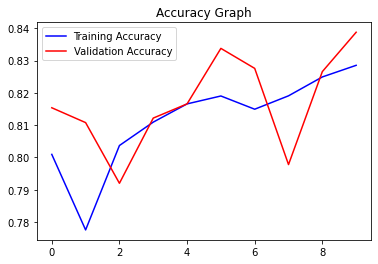

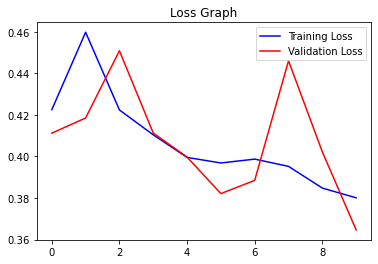

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))



plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()



loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()